# Estudi del mapa de Hénon

Aquest notebook conté el càlcul i la representació numèrica del comportament del mapa de Hénon:

$$
\begin{cases}
x_{n+1} = 1 - a x_n^2 + y_n, \\
y_{n+1} = b x_n,
\end{cases}
\quad \text{amb } (x_n, y_n) \in \mathbb{R}^2, \quad a, b \in \mathbb{R}.
$$

Es calcula l'**atractor del mapa de Hénon**, el **diagrama de bifurcació**, l'**exponent de Lyapunov màxim** en funció del paràmetre $a$ i la comparació de **dues òrbites properes** per un $a$ amb comportament caòtic. 






Imports i configuració inicial:

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

Definició del mapa de Hénon:

In [2]:
def henon_map(x, y, a=1.4, b=0.3):
    x_new = 1 - a * x**2 + y
    y_new = b * x
    return x_new, y_new

Simulació d'una òrbita:

In [8]:
def simulate_henon(x0, y0, steps=1000, a=1.4, b=0.3, max_abs=1e5):
    xs, ys = [x0], [y0]
    for _ in range(steps):
        x, y = henon_map(xs[-1], ys[-1], a, b)
        # Si els valors es disparen, atura
        if abs(x) > max_abs or abs(y) > max_abs:
            break
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


Dibuixem l'òrbita d'un punt inicial:

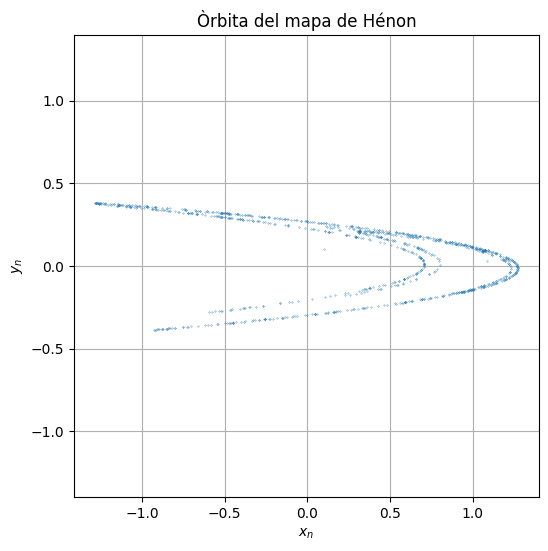

In [51]:
x0, y0 = 0.1, 0.1
xs, ys = simulate_henon(x0, y0)

plt.figure(figsize=(6, 6))
plt.plot(xs, ys, '.', markersize=0.5)
plt.title("Òrbita del mapa de Hénon")
plt.xlabel("$x_n$")
plt.ylabel("$y_n$")
plt.grid(True)
plt.axis("equal")
plt.show()


**Atractor de Hénon** (amb 10000 punts):

  0%|          | 0/1000 [00:00<?, ?it/s]

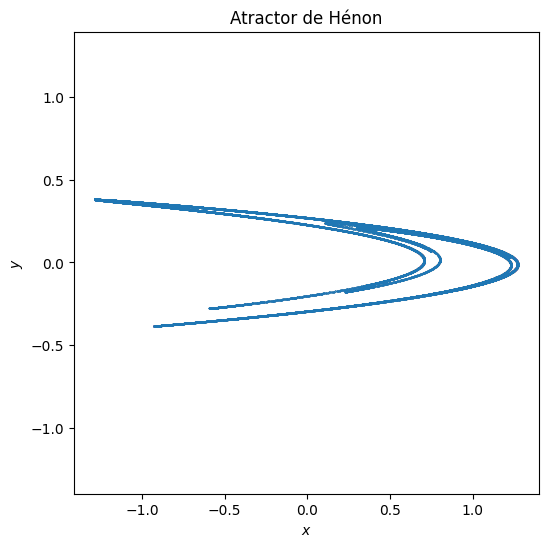

In [52]:
def henon_attractor(num_points=1000, steps=10000, a=1.4, b=0.3):
    xs, ys = [], []
    for _ in tqdm(range(num_points)):
        x, y = np.random.uniform(-1.2, 1.2), np.random.uniform(-0.4, 0.4)
        x_traj, y_traj = simulate_henon(x, y, steps=steps, a=a, b=b)
        if len(x_traj) > 100:  # només afegeix si l’òrbita va prou lluny
            xs.extend(x_traj[-100:])
            ys.extend(y_traj[-100:])
    return xs, ys


xs_attr, ys_attr = henon_attractor()

plt.figure(figsize=(6, 6))
plt.plot(xs_attr, ys_attr, '.', markersize=0.3, alpha=0.5)
plt.title("Atractor de Hénon")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis("equal")
plt.show()

*Comentari*: Les corbes de l'atractor de Hénon surten massa gruixudes ja que s'estan acumulant molts punts de moltes òrbites amb dispersió aleatòria, això fa que les òrbites "coincideixin". A continuació fem una verisó que dibuixa una sola òrbita llarga després del transitori. Aleshores, s'evita que les òrbites de barregin i es mostra correctament l'estructura fractal.

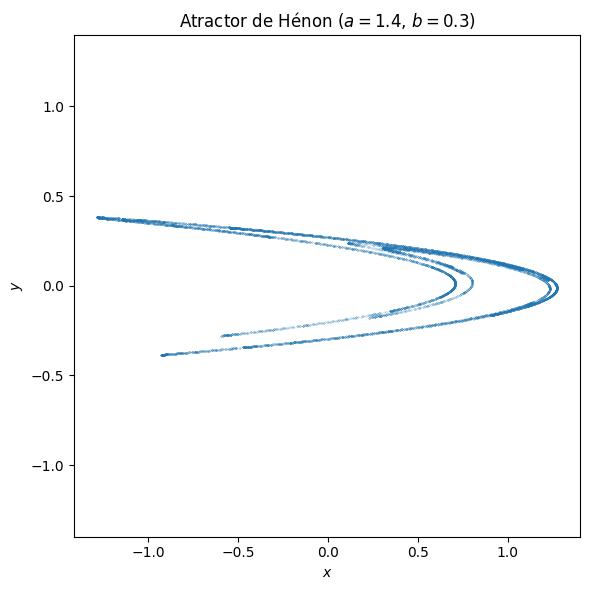

In [53]:
def simulate_single_orbit(x0=0, y0=0, steps=10000, discard=1000, a=1.4, b=0.3):
    xs, ys = [], []
    x, y = x0, y0
    for i in range(steps):
        x, y = 1 - a * x**2 + y, b * x
        if i >= discard:
            xs.append(x)
            ys.append(y)
    return xs, ys

# Generem una única òrbita
xs_attr, ys_attr = simulate_single_orbit(x0=0.1, y0=0.3, steps=15000, discard=1000)

# Dibuix
plt.figure(figsize=(6, 6))
plt.plot(xs_attr, ys_attr, '.', markersize=0.2, alpha=0.8)
plt.title("Atractor de Hénon ($a = 1.4$, $b = 0.3$)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis("equal")
plt.grid(False)
plt.tight_layout()
plt.show()

**Diagrama de bifurcació en funció del paràmetre $a$:**

  0%|          | 0/1000 [00:00<?, ?it/s]

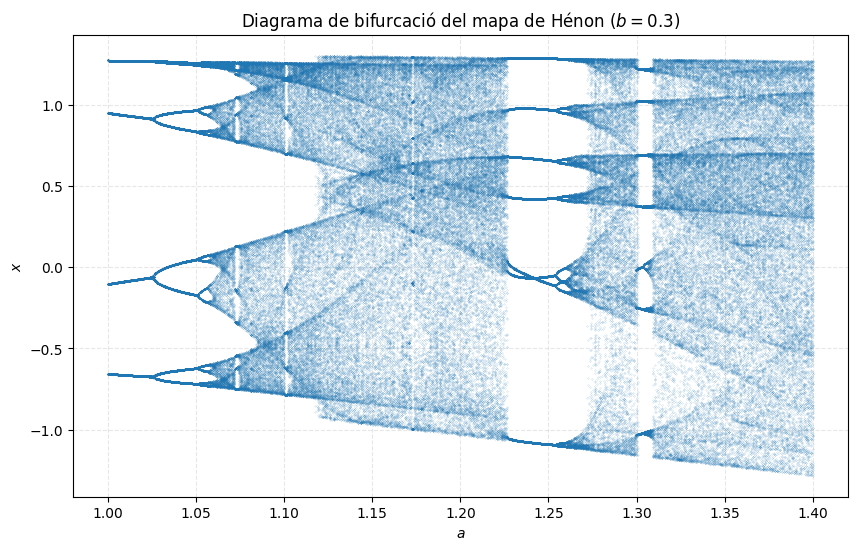

In [46]:
# Paràmetres del diagrama
a_values = np.linspace(1.0, 1.4, 1000)
b = 0.3
iterations = 1000
transient = 300

x0, y0 = 0.1, 0.1  # condició inicial

xs = []
as_ = []

for a in tqdm(a_values):
    x, y = x0, y0
    # Itera per eliminar transitori
    for _ in range(transient):
        x, y = henon_map(x, y, a, b)
    
    # Itera per recollir punts finals
    for _ in range(200):
        x, y = henon_map(x, y, a, b)
        xs.append(x)
        as_.append(a)

# Dibuixa el diagrama de bifurcació
plt.figure(figsize=(10, 6))
plt.plot(as_, xs, '.', markersize=0.3, alpha=0.6)
plt.title("Diagrama de bifurcació del mapa de Hénon ($b = 0.3$)")
plt.xlabel("$a$")
plt.ylabel("$x$")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

El diagrama mostra la transició de l'ordre al caos. 

Interpretació del diagrama:
- Per a valors baixos de $a$ (prop de 1.0) el sistema tendeix cap a diferents punts fixos, que es veu com una única línia o conjunt finit de punts per cada valor de $a$.

- Si augmentem $a$: el sistema experimenta duplicacions de període 1 a 2, 4, 8... que al gràfic es veu com una ramificació progressiva.

- Per valors de $a>1.06$ aprox: comença el comportament caòtic. En el gràfic es mostra com una disperssió de punts de forma vertical, és a dir, l'òrbita passa per molts valors diferents aparentment aleatoris. 

- Per $a=1.4$ aprox.: el sistema és plenament caòtic i es mostra l'estructura fractal. 

**Exponent de Lyapunov màxim**

Càlcul de l'exponent de Lyapunov màxim mitjançant el mètode de Benettin adaptat a dues dimensions:

In [54]:
def lyapunov_henon(x0, y0, steps=1000, a=1.4, b=0.3, delta0=1e-8):
    x, y = x0, y0
    delta = np.array([delta0, 0.0])
    sum_log = 0.0

    for _ in range(steps):
        x, y = henon_map(x, y, a, b)

        # Jacobiana del mapa de Hénon
        J = np.array([[-2*a*x, 1],
                      [b,     0]])

        delta = J @ delta
        norm = np.linalg.norm(delta)
        delta /= norm
        sum_log += np.log(norm)

    return sum_log / steps


Gràfic de $\lambda_{max}$ segons del paràmetre $a$:

  0%|          | 0/300 [00:00<?, ?it/s]

C:\Users\cmarc\AppData\Local\Temp\ipykernel_1272\2644822521.py:2: RuntimeWarning: overflow encountered in scalar power
  x_new = 1 - a * x**2 + y
C:\Users\cmarc\AppData\Local\Temp\ipykernel_1272\3432945502.py:13: RuntimeWarning: invalid value encountered in matmul
  delta = J @ delta
C:\Users\cmarc\AppData\Local\Temp\ipykernel_1272\3432945502.py:15: RuntimeWarning: invalid value encountered in divide
  delta /= norm
C:\Users\cmarc\AppData\Local\Temp\ipykernel_1272\3432945502.py:16: RuntimeWarning: divide by zero encountered in log
  sum_log += np.log(norm)
C:\Users\cmarc\AppData\Local\Temp\ipykernel_1272\3432945502.py:16: RuntimeWarning: invalid value encountered in scalar add
  sum_log += np.log(norm)


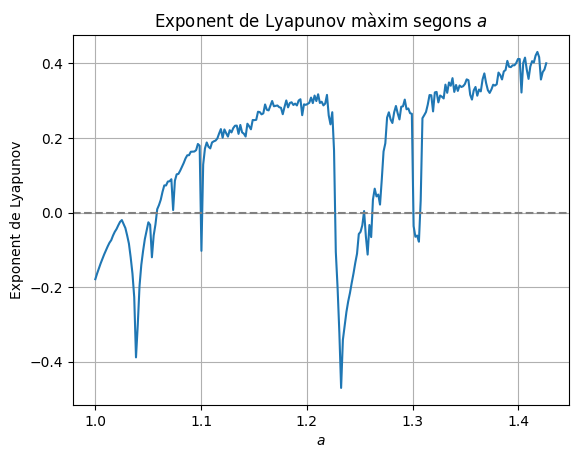

In [55]:
a_vals = np.linspace(1.0, 1.5, 300)
lyap_vals = [lyapunov_henon(0.1, 0.1, a=a) for a in tqdm(a_vals)]

plt.figure()
plt.plot(a_vals, lyap_vals)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("$a$")
plt.ylabel("Exponent de Lyapunov")
plt.title("Exponent de Lyapunov màxim segons $a$")
plt.grid(True)
plt.show()


Generem una taula de valors de $a$ i els corresponents exponents de Lyapunov màxims:

In [56]:
# Rang de valors de 'a'
a_vals = np.linspace(1.0, 1.4, 20)
lyap_vals = []

for a in tqdm(a_vals):
    lyap = lyapunov_henon(0.1,0.1,a=a)
    lyap_vals.append(lyap)

# Crear la taula
df_lyap = pd.DataFrame({
    'a': np.round(a_vals, 6),
    'lyapunov': np.round(lyap_vals, 6)
})

print(df_lyap) 

  0%|          | 0/20 [00:00<?, ?it/s]

           a  lyapunov
0   1.000000 -0.178633
1   1.021053 -0.039157
2   1.042105 -0.185108
3   1.063158  0.054666
4   1.084211  0.139248
5   1.105263  0.172807
6   1.126316  0.222493
7   1.147368  0.245523
8   1.168421  0.278364
9   1.189474  0.311794
10  1.210526  0.294509
11  1.231579 -0.514639
12  1.252632 -0.032774
13  1.273684  0.161663
14  1.294737  0.265600
15  1.315789  0.276907
16  1.336842  0.342289
17  1.357895  0.342234
18  1.378947  0.369345
19  1.400000  0.416646


**Comparació d'òrbites amb condicions inicials properes**

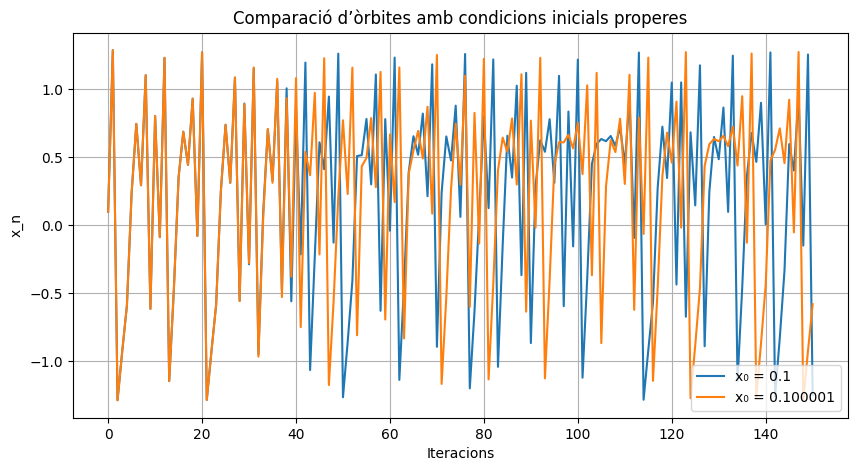

In [32]:
x0_1, y0_1 = 0.1, 0.3
x0_2, y0_2 = 0.100001, 0.3

steps = 150

x1, y1 = simulate_henon(x0_1, y0_1, steps)
x2, y2 = simulate_henon(x0_2, y0_2, steps)

plt.figure(figsize=(10, 5))
plt.plot(x1, label="x₀ = 0.1")
plt.plot(x2, label="x₀ = 0.100001")
plt.xlabel("Iteracions")
plt.ylabel("x_n")
plt.title("Comparació d’òrbites amb condicions inicials properes")
plt.legend()
plt.grid(True)
plt.show()


Calculem la distància entre les òrbites escala logarítmica i la representem gràficament:

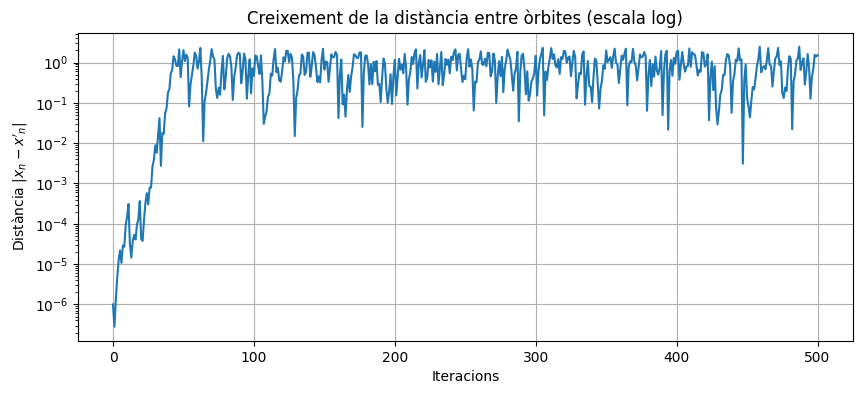

In [23]:
min_len = min(len(x1), len(x2))
distances = np.abs(np.array(x1[:min_len]) - np.array(x2[:min_len]))

plt.figure(figsize=(10, 4))
plt.semilogy(distances)
plt.xlabel("Iteracions")
plt.ylabel("Distància $|x_n - x'_n|$")
plt.title("Creixement de la distància entre òrbites (escala log)")
plt.grid(True)
plt.show()
